In [74]:
from Network import FeedForwardNetwork
from NN_deri_Lorenz import train_lorenz, obtain_lorenz_data
from NN_deri_two_compart import train_twocompart, obtain_twocompart_data
from NN_deri_nonlinear import train_nonlinear,obtain_nonlinear_data
from scipy.integrate import odeint
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pandas
from Gaussian_process_der import GP_derivative, GP, rbf, rbf_fd
from lorenz import create_data_lorenz
from non_linear import create_data_nonlinear
from two_compartment import create_data_twocompart
from Derivative_Data_Lorenz import obtain_train_data_Lorenz
from Derivative_Data_NonLinear import obtain_train_data_NonLinear
from Derivative_Data_Two_Compart import obtain_train_data_Two_compart
import derivative
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [90]:

def true_derivative_nonlinear():
    T, Y = create_data_nonlinear(p=0.)
    result_1=[]
    result_2=[]
    for i in range(len(T)):
        u = Y[i,0]
        v = Y[i,1]
        result_1.append(-0.1*u**3 + 2*v**3)
        result_2.append(-2*u**3 - 0.1*v**3)
    return np.array(result_1), np.array(result_2)

def true_derivative_lorenz():
    T, Y = create_data_lorenz(p=0.)
    result_1=[]
    result_2=[]
    result_3=[]
    for i in range(len(T)):
        x = Y[i,0]
        y = Y[i,1]
        z = Y[i,2]
        result_1.append(-10*x + 10*y)
        result_2.append(28*x-y-x*z)
        result_3.append((-8/3)*z+x*y)
    return np.array(result_1), np.array(result_2), np.array(result_3)


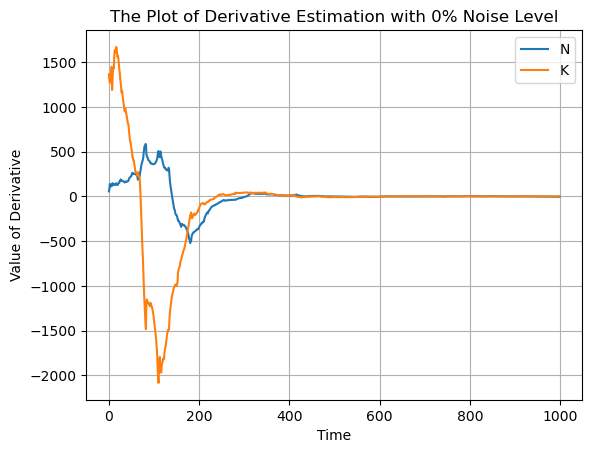

In [70]:
network_compart = FeedForwardNetwork(2)
T, Y = create_data_twocompart(p=0.)
network_compart.load_weights('./NN_twocompart_checkpoints_000/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_compart,T)
plt.plot(y_1_train,label= "N")
plt.plot(y_2_train,label= "K")
plt.title('The Plot of Derivative Estimation with 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

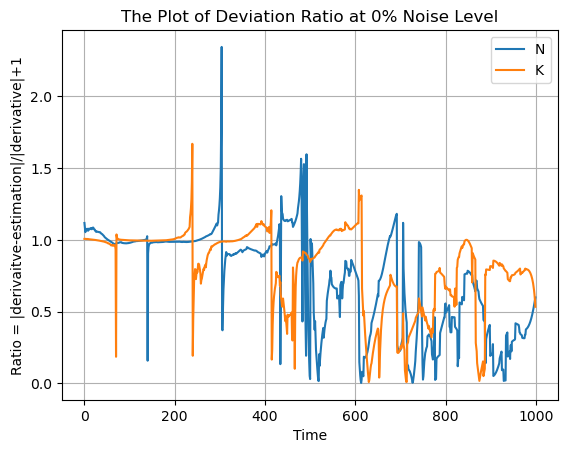

In [79]:
network_compart = FeedForwardNetwork(2)

T, Y = create_data_twocompart(p=0.)
T, Y_T = create_data_twocompart(p=0)

result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
network_compart.load_weights('./NN_twocompart_checkpoints_000/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_compart,T)
plt.plot(np.abs(result_1-y_1_train)/(np.abs(y_1_train)+1),label= "N")
plt.plot(np.abs(result_2-y_2_train)/(np.abs(y_2_train)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

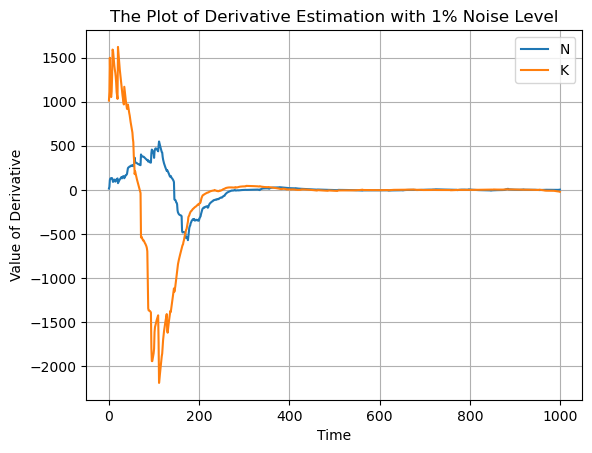

In [20]:
network_compart = FeedForwardNetwork(2)
T, Y = create_data_twocompart(p=0.01)
network_compart.load_weights('./NN_twocompart_checkpoints_001/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_compart,T)
plt.plot(y_1_train,label= "N")
plt.plot(y_2_train,label= "K")
plt.title('The Plot of Derivative Estimation with 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

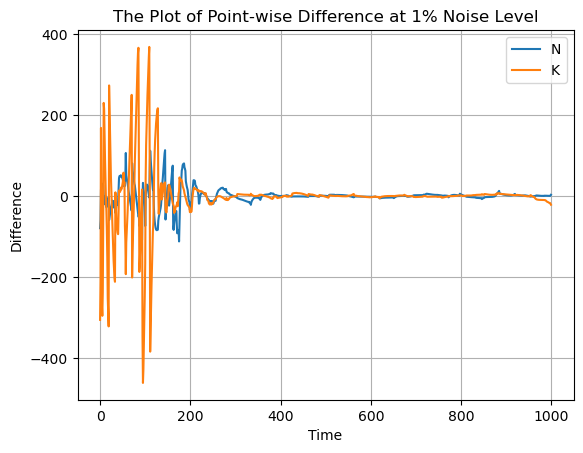

In [21]:
network_compart = FeedForwardNetwork(2)

T, Y = create_data_twocompart(p=0.)
T, Y_T = create_data_twocompart(p=0)

result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
network_compart.load_weights('./NN_twocompart_checkpoints_001/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_compart,T)
plt.plot(np.abs(result_1-y_1_train)/(np.abs(y_1_train)+1),label= "N")
plt.plot(np.abs(result_2-y_2_train)/(np.abs(y_2_train)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

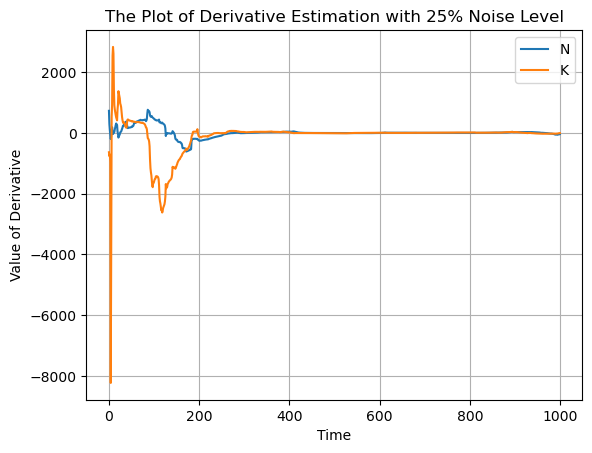

In [22]:
network_compart = FeedForwardNetwork(2)
T, Y = create_data_twocompart(p=0.)
network_compart.load_weights('./NN_twocompart_checkpoints_025/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_compart,T)
plt.plot(y_1_train,label= "N")
plt.plot(y_2_train,label= "K")
plt.title('The Plot of Derivative Estimation with 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

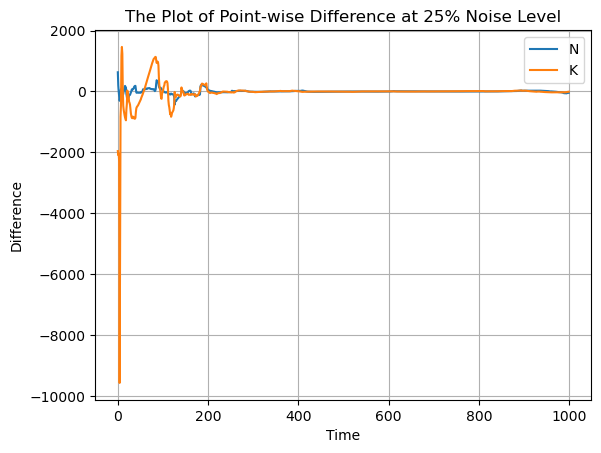

In [23]:
network_compart = FeedForwardNetwork(2)

T, Y = create_data_twocompart(p=0.)
T, Y_T = create_data_twocompart(p=0)

result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
network_compart.load_weights('./NN_twocompart_checkpoints_025/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_compart,T)
plt.plot(np.abs(result_1-y_1_train)/(np.abs(y_1_train)+1),label= "N")
plt.plot(np.abs(result_2-y_2_train)/(np.abs(y_2_train)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

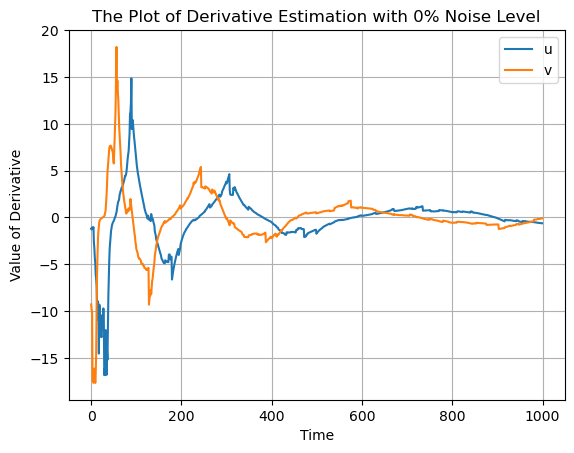

In [24]:
network_nonlinear= FeedForwardNetwork(2)
T, Y = create_data_nonlinear(p=0.)
network_nonlinear.load_weights('./NN_nonlinear_checkpoints_000/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_nonlinear,T)
plt.plot(y_1_train,label= "u")
plt.plot(y_2_train,label= "v")
plt.title('The Plot of Derivative Estimation with 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

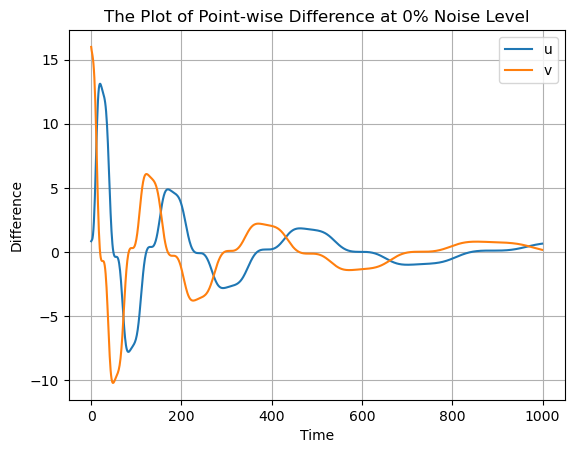

In [29]:
network_nonlinear = FeedForwardNetwork(2)

T, Y = create_data_nonlinear(p=0.)
T, Y_T = create_data_nonlinear(p=0)

result_1_T, result_2_T = true_derivative_nonlinear()
network_nonlinear.load_weights('./NN_nonlinear_checkpoints_000/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_nonlinear_data(network_nonlinear,T)
plt.plot(np.abs(result_1-y_1_train)/(np.abs(y_1_train)+1),label= "u")
plt.plot(np.abs(result_2-y_2_train)/(np.abs(y_2_train)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

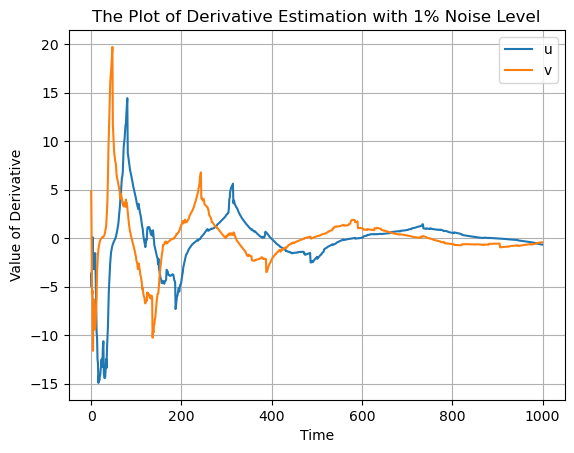

In [30]:
network_nonlinear = FeedForwardNetwork(2)
T, Y = create_data_nonlinear(p=0.01)
network_nonlinear.load_weights('./NN_nonlinear_checkpoints_001/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_nonlinear,T)
plt.plot(y_1_train,label= "u")
plt.plot(y_2_train,label= "v")
plt.title('The Plot of Derivative Estimation with 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

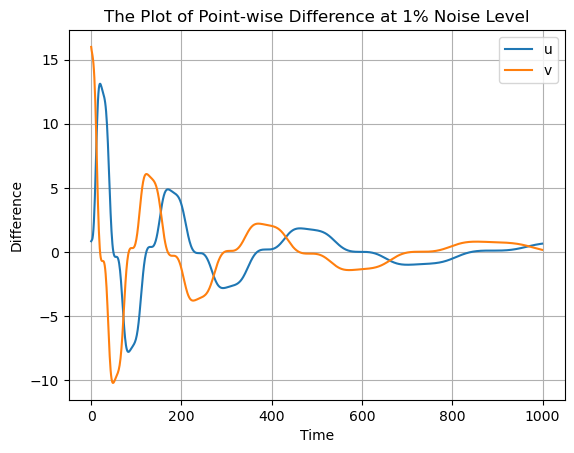

In [31]:
network_nonlinear = FeedForwardNetwork(2)

T, Y = create_data_nonlinear(p=0.01)
T, Y_T = create_data_nonlinear(p=0)

result_1_T, result_2_T = true_derivative_nonlinear()
network_nonlinear.load_weights('./NN_nonlinear_checkpoints_001/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_nonlinear_data(network_nonlinear,T)
plt.plot(np.abs(result_1-y_1_train)/(np.abs(y_1_train)+1),label= "u")
plt.plot(np.abs(result_2-y_2_train)/(np.abs(y_2_train)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

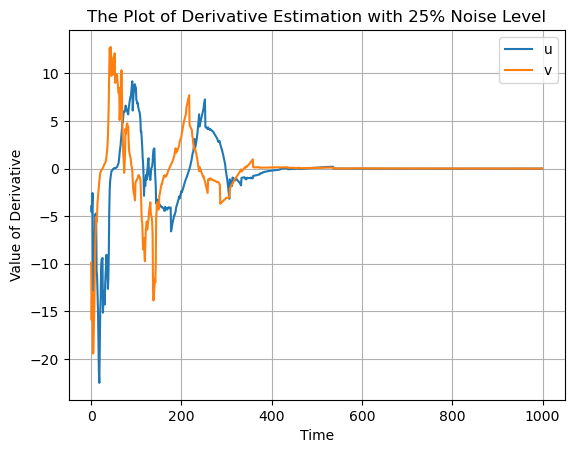

In [32]:
network_nonlinear = FeedForwardNetwork(2)
T, Y = create_data_nonlinear(p=0.25)
network_nonlinear.load_weights('./NN_nonlinear_checkpoints_025/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_twocompart_data(network_nonlinear,T)
plt.plot(y_1_train,label= "u")
plt.plot(y_2_train,label= "v")
plt.title('The Plot of Derivative Estimation with 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

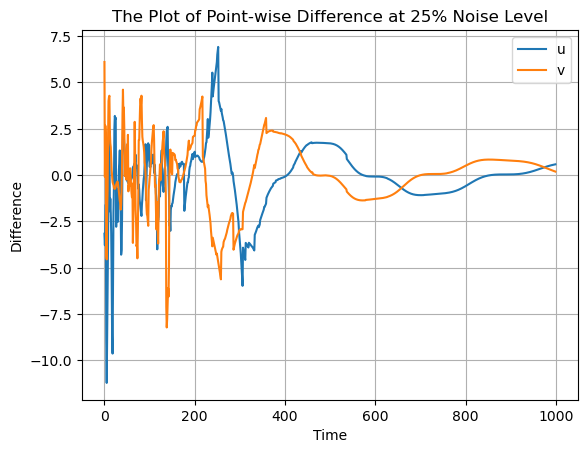

In [33]:
network_nonlinear = FeedForwardNetwork(2)

T, Y = create_data_nonlinear(p=0.25)
T, Y_T = create_data_nonlinear(p=0)

result_1_T, result_2_T = true_derivative_nonlinear()
network_nonlinear.load_weights('./NN_nonlinear_checkpoints_025/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_nonlinear_data(network_nonlinear,T)
plt.plot(np.abs(result_1_T-y_1_train)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-y_2_train)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

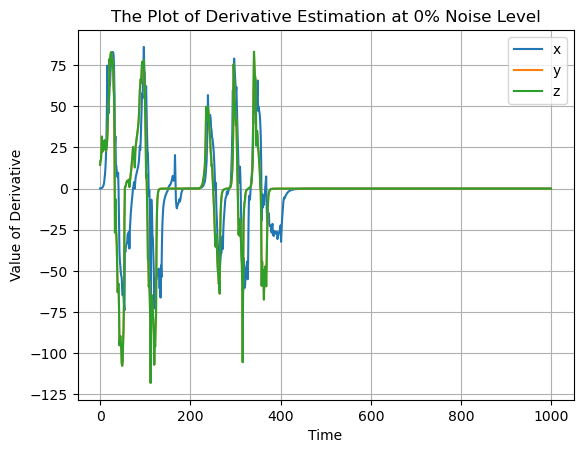

In [75]:
network_lorenz = FeedForwardNetwork(3)
T, Y = create_data_lorenz(p=0.)
network_lorenz.load_weights('./NN_lorenz_checkpoints_000/my_checkpoint')
x_train, y_1_train, y_2_train ,y_3_train= obtain_lorenz_data(network_lorenz,T)
plt.plot(y_1_train,label= "x")
plt.plot(y_2_train,label= "y")
plt.plot(y_3_train,label= "z")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

In [35]:
network_lorenz = FeedForwardNetwork(3)

T, Y = create_data_nonlinear(p=0)
T, Y_T = create_data_nonlinear(p=0)

result_1_T, result_2_T, result_3_T = true_derivative_lorenz()
network_lorenz.load_weights('./NN_lorenz_checkpoints_000/my_checkpoint')
x_train, y_1_train, y_2_train ,y_3_train= obtain_lorenz_data(network_lorenz,T)
plt.plot(np.abs(result_1_T-y_1_train)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-y_2_train)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-y_3_train)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

TypeError: Field elements must be 2- or 3-tuples, got '-128.0'

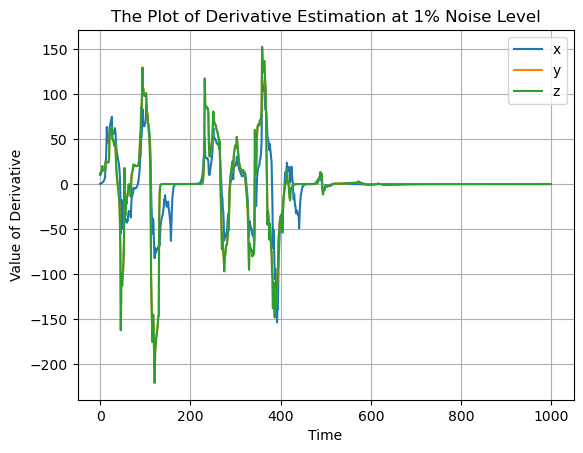

In [76]:
network_lorenz = FeedForwardNetwork(3)
T, Y = create_data_lorenz(p=0.01)
network_lorenz.load_weights('./NN_lorenz_checkpoints_001/my_checkpoint')
x_train, y_1_train, y_2_train ,y_3_train= obtain_lorenz_data(network_lorenz,T)
plt.plot(y_1_train,label= "x")
plt.plot(y_2_train,label= "y")
plt.plot(y_3_train,label= "z")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

In [ ]:
network_lorenz = FeedForwardNetwork(3)

T, Y = create_data_nonlinear(p=0)
T, Y_T = create_data_nonlinear(p=0)

result_1_T, result_2_T, result_3_T = true_derivative_lorenz()
network_lorenz.load_weights('./NN_lorenz_checkpoints_001/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_lorenz_data(network_lorenz,T)
plt.plot(np.abs(result_1_T-y_1_train)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-y_2_train)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-y_3_train)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

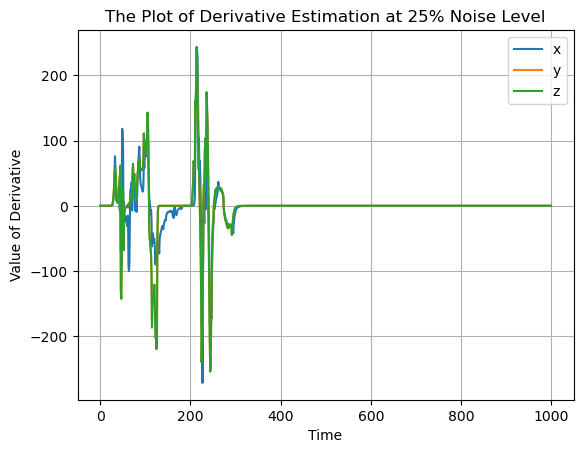

In [77]:
network_lorenz = FeedForwardNetwork(3)
T, Y = create_data_lorenz(p=0.)
network_lorenz.load_weights('./NN_lorenz_checkpoints_025/my_checkpoint')
x_train, y_1_train, y_2_train ,y_3_train= obtain_lorenz_data(network_lorenz,T)
plt.plot(y_1_train,label= "x")
plt.plot(y_2_train,label= "y")
plt.plot(y_3_train,label= "z")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()

In [ ]:
network_lorenz = FeedForwardNetwork(3)

T, Y = create_data_nonlinear(p=0)
T, Y_T = create_data_nonlinear(p=0)

result_1_T, result_2_T, result_3_T = true_derivative_lorenz()
network_lorenz.load_weights('./NN_lorenz_checkpoints_025/my_checkpoint')
x_train, y_1_train, y_2_train = obtain_lorenz_data(network_lorenz,T)
plt.plot(np.abs(result_1_T-y_1_train)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-y_2_train)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-y_3_train)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

In [38]:
para_two_compart_1 = np.load('gp_000_para_tc_1.npy')
para_two_compart_2 = np.load('gp_000_para_tc_2.npy')
para_nonlinear_1  = np.load('gp_000_para_nl_1.npy')
para_nonlinear_2 = np.load('gp_000_para_nl_2.npy')
para_lorenz_1 =np.load('gp_000_para_lr_1.npy')
para_lorenz_2 =np.load('gp_000_para_lr_2.npy')
para_lorenz_3 =np.load('gp_000_para_lr_3.npy')

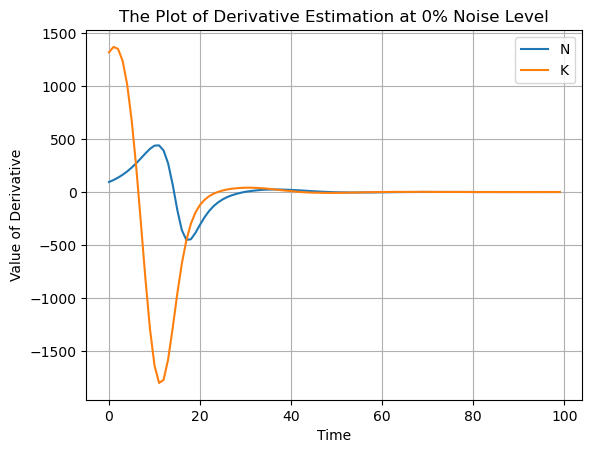

In [44]:
T,Y=create_data_twocompart(p=0.0)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)

plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


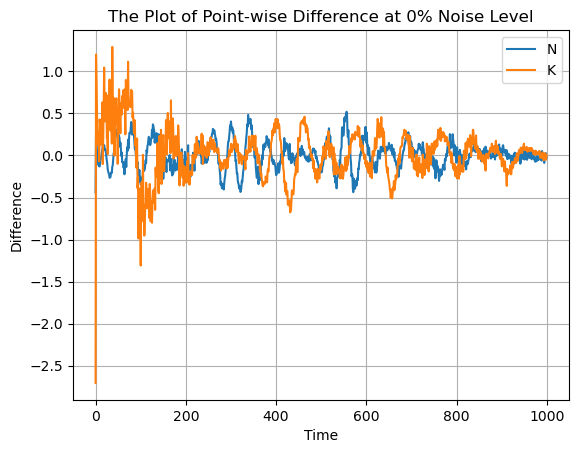

In [51]:
T,Y=create_data_twocompart(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
T, Y_T = create_data_twocompart(p=0)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "N")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


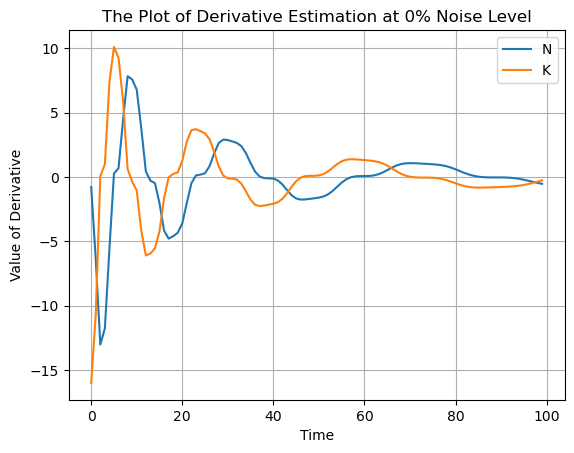

In [52]:
T,Y=create_data_nonlinear(p=0)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)

plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


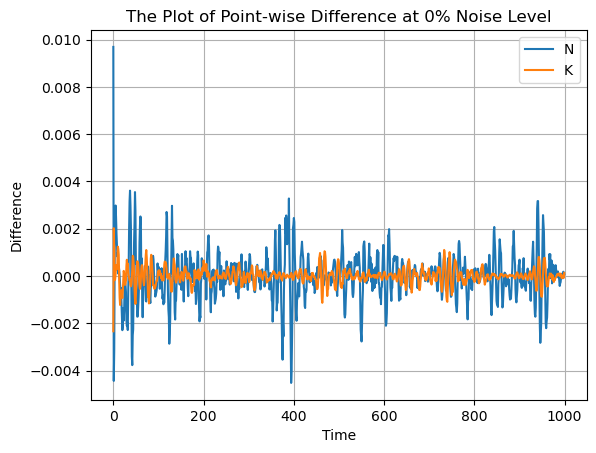

In [53]:
T,Y=create_data_nonlinear(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1_T,result_2_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

plt.plot(result_1,label= "x")
plt.plot(result_2,label= "y")
plt.plot(result_3,label= "z")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

result_1_T,result_2_T,result_3_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-result_3)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [55]:
para_two_compart_1 = np.load('gp_001_para_tc_1.npy')
para_two_compart_2 = np.load('gp_001_para_tc_2.npy')
para_nonlinear_1  = np.load('gp_001_para_nl_1.npy')
para_nonlinear_2 = np.load('gp_001_para_nl_2.npy')
para_lorenz_1 =np.load('gp_001_para_lr_1.npy')
para_lorenz_2 =np.load('gp_001_para_lr_2.npy')
para_lorenz_3 =np.load('gp_001_para_lr_3.npy')

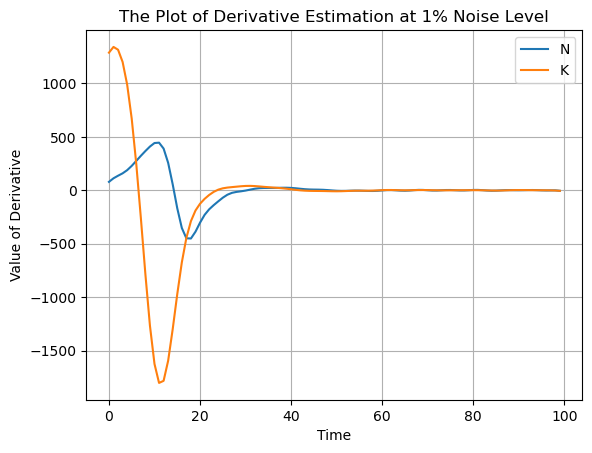

In [57]:
T,Y=create_data_twocompart(p=0.01)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)

plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


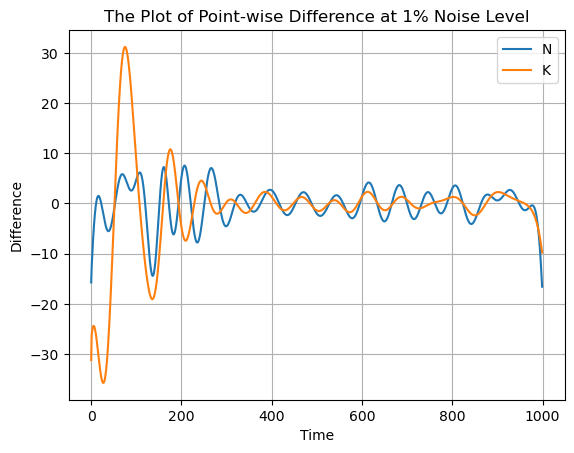

In [59]:
T,Y=create_data_twocompart(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
T, Y_T = create_data_twocompart(p=0)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "N")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


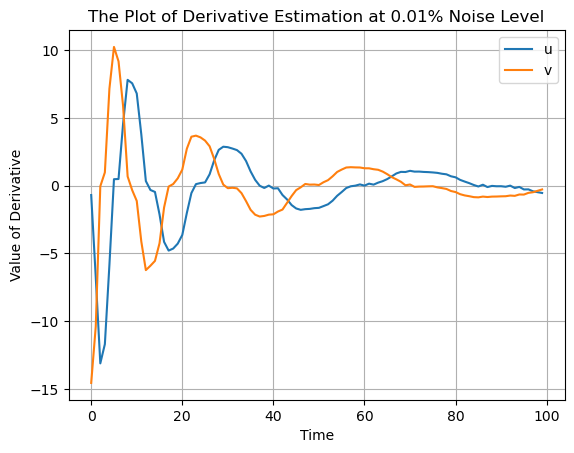

In [60]:
T,Y=create_data_nonlinear(p=0.01)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)

plt.plot(result_1,label= "u")
plt.plot(result_2,label= "v")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


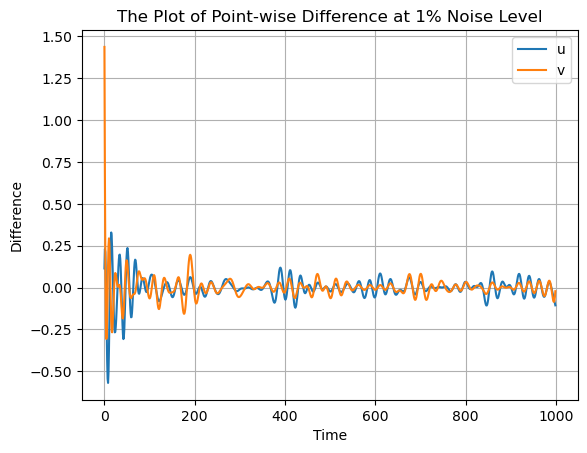

In [61]:
T,Y=create_data_nonlinear(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1_T,result_2_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

In [ ]:
T,Y=obtain_lorenz_data(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

plt.plot(result_1,label= "x")
plt.plot(result_2,label= "y")
plt.plot(result_3,label= "z")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

result_1_T,result_2_T,result_3_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-y_1_train)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-y_2_train)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-y_3_train)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [63]:
para_two_compart_1 = np.load('gp_025_para_tc_1.npy')
para_two_compart_2 = np.load('gp_025_para_tc_2.npy')
para_nonlinear_1  = np.load('gp_025_para_nl_1.npy')
para_nonlinear_2 = np.load('gp_025_para_nl_2.npy')
para_lorenz_1 =np.load('gp_025_para_lr_1.npy')
para_lorenz_2 =np.load('gp_025_para_lr_2.npy')
para_lorenz_3 =np.load('gp_025_para_lr_3.npy')

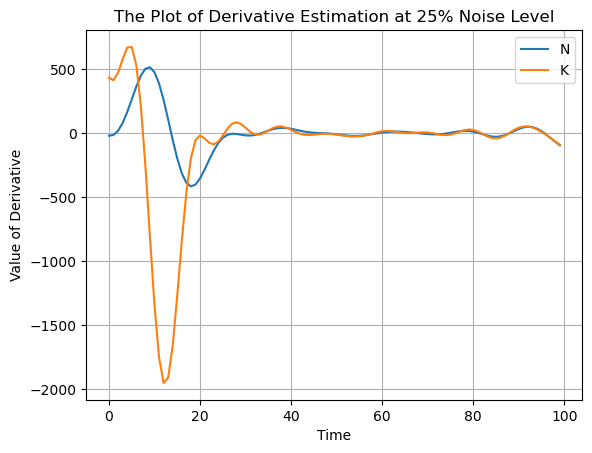

In [64]:
T,Y=create_data_twocompart(p=0.25)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)

plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


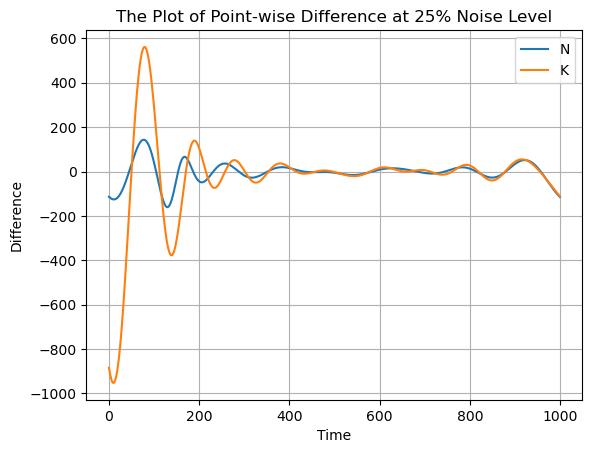

In [66]:
T,Y=create_data_twocompart(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
T, Y_T = create_data_twocompart(p=0)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "N")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


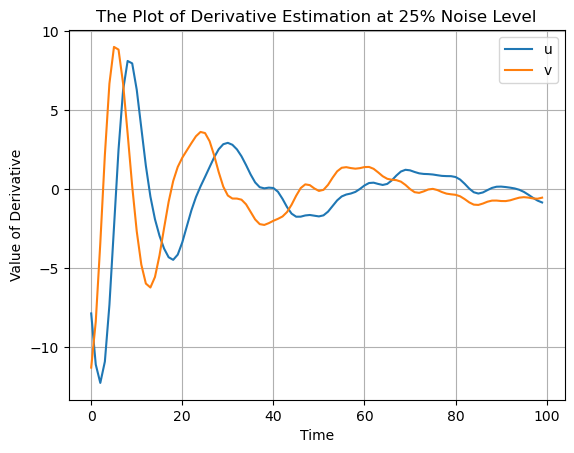

In [67]:
T,Y=create_data_nonlinear(p=0.25)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.1)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)

plt.plot(result_1,label= "u")
plt.plot(result_2,label= "v")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


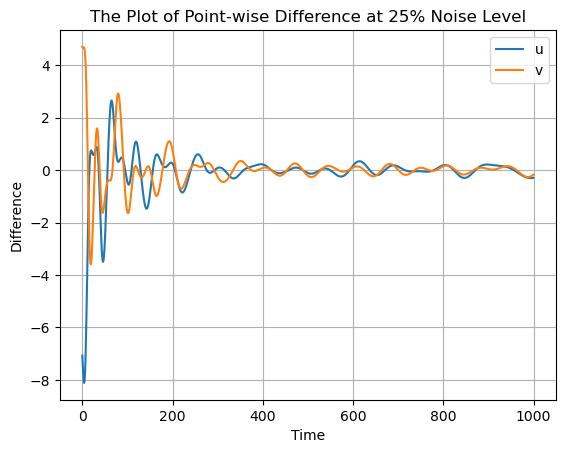

In [68]:
T,Y=create_data_nonlinear(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1_T,result_2_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

plt.plot(result_1,label= "x")
plt.plot(result_2,label= "y")
plt.plot(result_3,label= "z")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

result_1_T,result_2_T,result_3_T=true_derivative_lorenz()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-result_3)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [ ]:
para_two_compart_1 = np.load('gp_000_para_tc_1.npy')
para_two_compart_2 = np.load('gp_000_para_tc_2.npy')
para_nonlinear_1  = np.load('gp_000_para_nl_1.npy')
para_nonlinear_2 = np.load('gp_000_para_nl_2.npy')
para_lorenz_1 =np.load('gp_000_para_lr_1.npy')
para_lorenz_2 =np.load('gp_000_para_lr_2.npy')
para_lorenz_3 =np.load('gp_000_para_lr_3.npy')

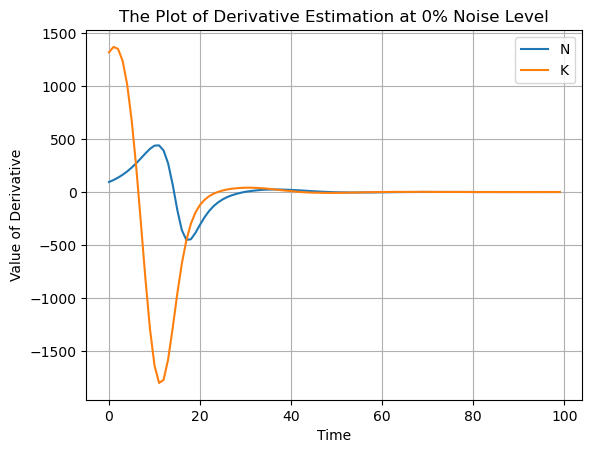

In [ ]:
T,Y=create_data_twocompart(p=0.0)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


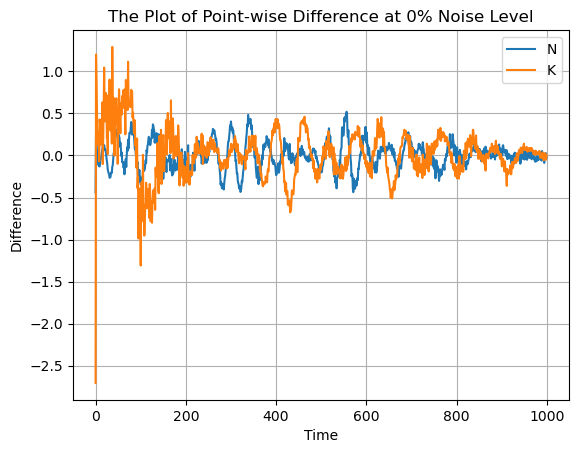

In [ ]:
T,Y=create_data_twocompart(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
T, Y_T = create_data_twocompart(p=0)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "N")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


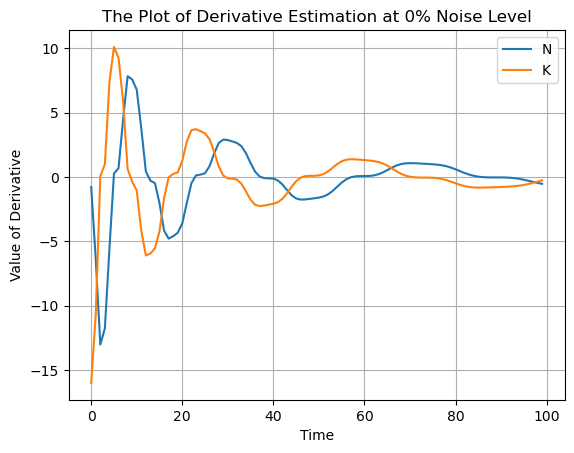

In [ ]:
T,Y=create_data_nonlinear(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)

plt.plot(result_1,label= "u")
plt.plot(result_2,label= "v")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


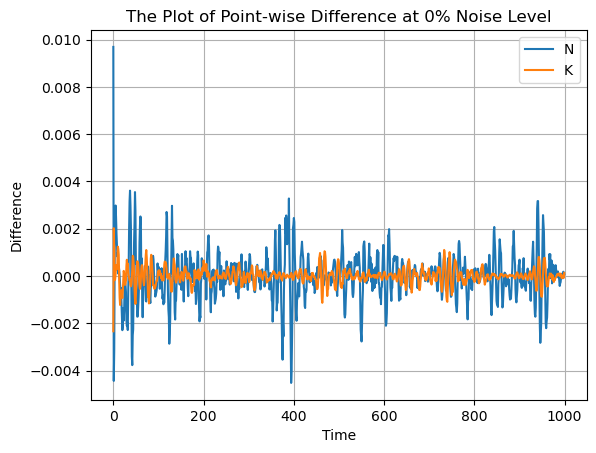

In [ ]:
T,Y=create_data_nonlinear(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP_derivative(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_1_T,result_2_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(result_3, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "x")
plt.plot(result_2,label= "y")
plt.plot(result_3,label= "z")
plt.title('The Plot of Derivative Estimation at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)

result_1_T,result_2_T,result_3_T=true_derivative_lorenz()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-result_3)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 0% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [ ]:
para_two_compart_1 = np.load('gp_001_para_tc_1.npy')
para_two_compart_2 = np.load('gp_001_para_tc_2.npy')
para_nonlinear_1  = np.load('gp_001_para_nl_1.npy')
para_nonlinear_2 = np.load('gp_001_para_nl_2.npy')
para_lorenz_1 =np.load('gp_001_para_lr_1.npy')
para_lorenz_2 =np.load('gp_001_para_lr_2.npy')
para_lorenz_3 =np.load('gp_001_para_lr_3.npy')

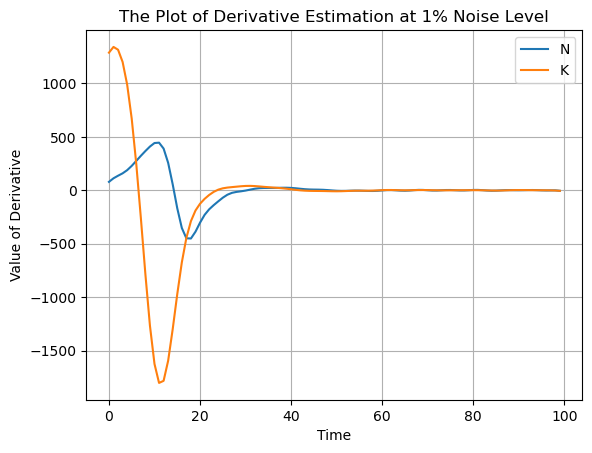

In [ ]:
T,Y=create_data_twocompart(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


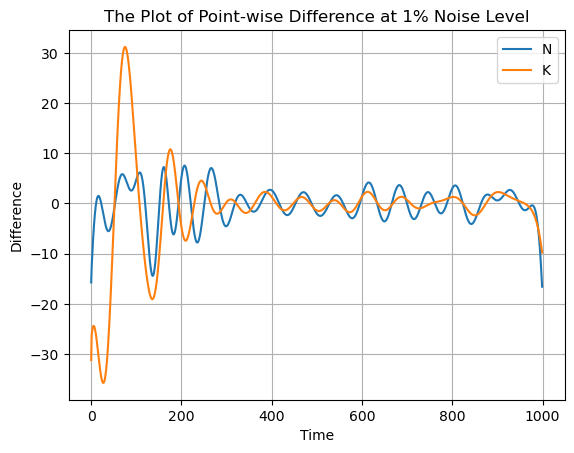

In [ ]:
T,Y=create_data_twocompart(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "N")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


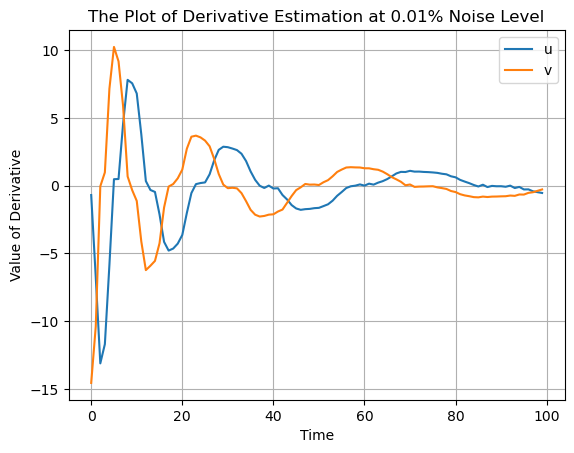

In [ ]:
T,Y=create_data_nonlinear(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "u")
plt.plot(result_2,label= "v")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


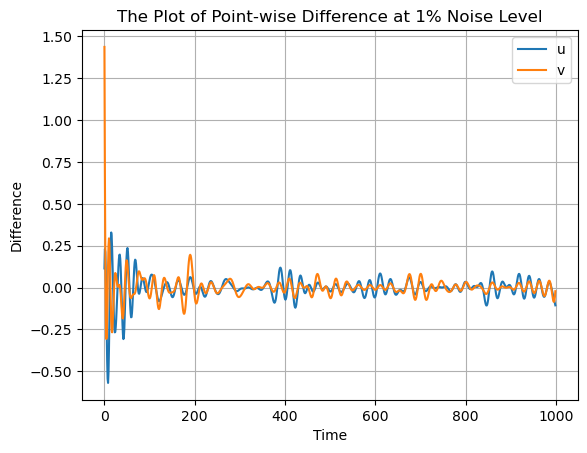

In [ ]:
T,Y=create_data_nonlinear(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_1_T,result_2_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()

In [ ]:
T,Y=obtain_lorenz_data(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(result_3, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "x")
plt.plot(result_2,label= "y")
plt.plot(result_3,label= "z")
plt.title('The Plot of Derivative Estimation at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


In [ ]:
T,Y=obtain_lorenz_data(p=0.01)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(result_3, T, kind="finite_difference", k=2)
result_1_T,result_2_T,result_3_T=true_derivative_lorenz()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-result_3)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 1% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


In [81]:
para_two_compart_1 = np.load('gp_025_para_tc_1.npy')
para_two_compart_2 = np.load('gp_025_para_tc_2.npy')
para_nonlinear_1  = np.load('gp_025_para_nl_1.npy')
para_nonlinear_2 = np.load('gp_025_para_nl_2.npy')
para_lorenz_1 =np.load('gp_025_para_lr_1.npy')
para_lorenz_2 =np.load('gp_025_para_lr_2.npy')
para_lorenz_3 =np.load('gp_025_para_lr_3.npy')

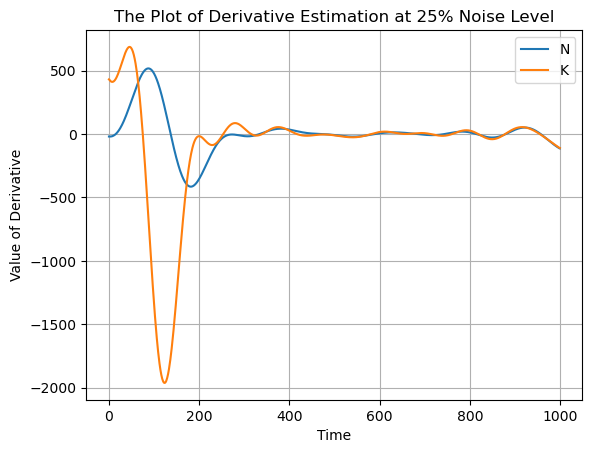

In [82]:
T,Y=create_data_twocompart(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "N")
plt.plot(result_2,label= "K")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


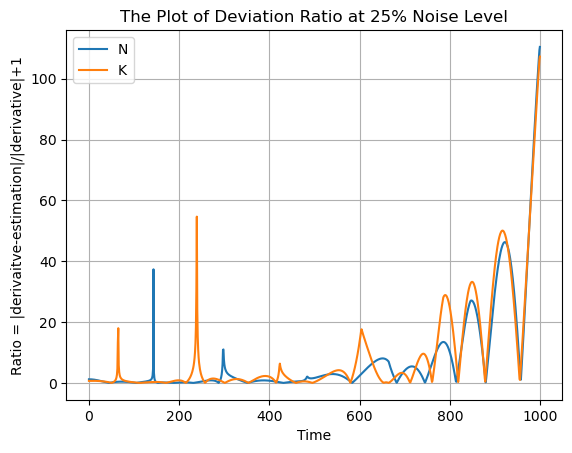

In [83]:
T,Y=create_data_twocompart(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_1[0],para_two_compart_1[1]],
sigma=para_two_compart_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_two_compart_2[0],para_two_compart_2[1]],
sigma=para_two_compart_2[2]
)
T, Y_T = create_data_twocompart(p=0)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_1_T = derivative.dxdt(Y_T[:,0], T, kind="finite_difference", k=2)
result_2_T = derivative.dxdt(Y_T[:,1], T, kind="finite_difference", k=2)
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "N")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "K")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


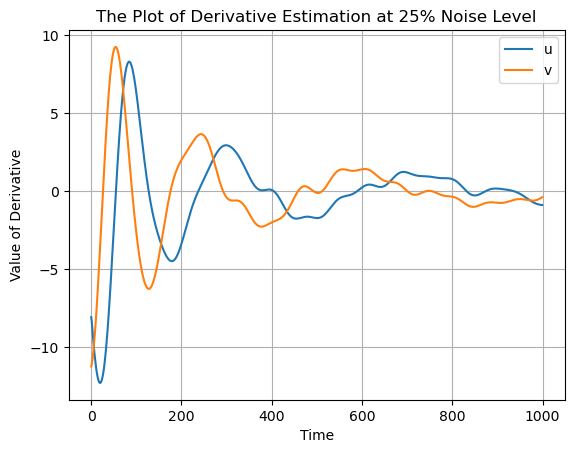

In [84]:
T,Y=create_data_nonlinear(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "u")
plt.plot(result_2,label= "v")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


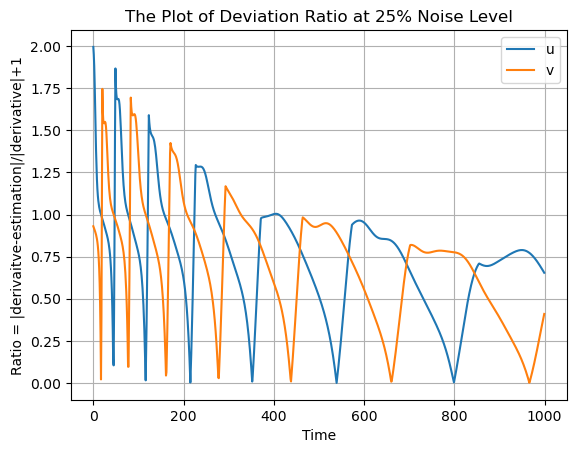

In [85]:
T,Y=create_data_nonlinear(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_1[0],para_nonlinear_1[1]],
sigma=para_nonlinear_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_nonlinear_2[0],para_nonlinear_2[1]],
sigma=para_nonlinear_2[2]
)
result_1_T,result_2_T=true_derivative_nonlinear()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "u")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "v")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()


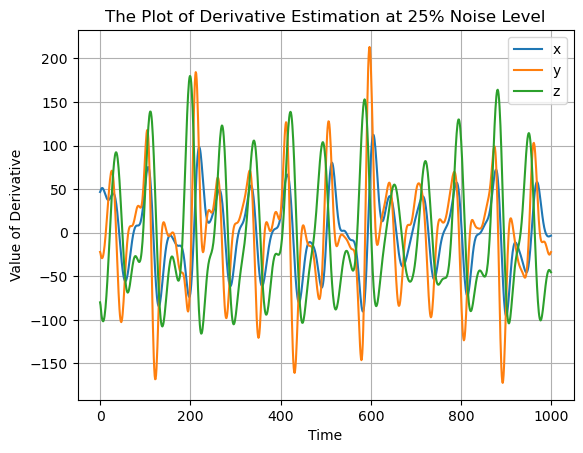

In [87]:
T,Y=create_data_lorenz(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(result_3, T, kind="finite_difference", k=2)
plt.plot(result_1,label= "x")
plt.plot(result_2,label= "y")
plt.plot(result_3,label= "z")
plt.title('The Plot of Derivative Estimation at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Value of Derivative')
plt.legend()
plt.grid()


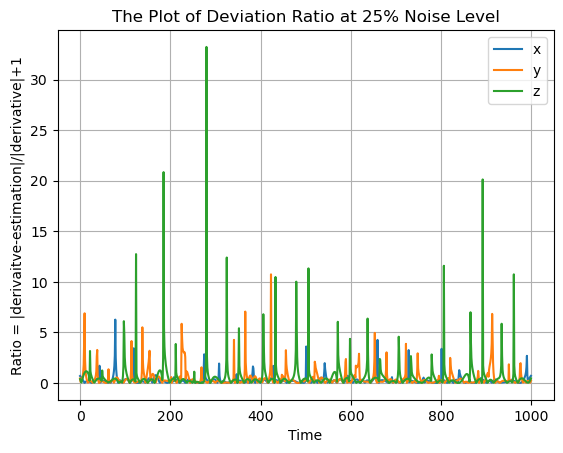

In [96]:
T,Y=create_data_lorenz(p=0.25)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_1 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,0]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_1[0],para_lorenz_1[1]],
sigma=para_lorenz_1[2]
)
toy_xp = np.arange(0,10,0.01)
gp = GP(kernel=rbf, kernel_diff=rbf_fd)
result_2 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,1]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_2[0],para_lorenz_2[1]],
sigma=para_lorenz_2[2]
)
result_3 = gp.predict_mean(
x_star=toy_xp,  # set to test points
X = np.array(T),     # set to observed x
y = np.array(Y[:,2]),       # set to observed y
size=1,    # draw 100 posterior samples 
theta=[para_lorenz_3[0],para_lorenz_3[1]],
sigma=para_lorenz_3[2]
)
result_1 = derivative.dxdt(result_1, T, kind="finite_difference", k=2)
result_2 = derivative.dxdt(result_2, T, kind="finite_difference", k=2)
result_3 = derivative.dxdt(result_3, T, kind="finite_difference", k=2)
result_1_T,result_2_T,result_3_T=true_derivative_lorenz()
plt.plot(np.abs(result_1_T-result_1)/(np.abs(result_1_T)+1),label= "x")
plt.plot(np.abs(result_2_T-result_2)/(np.abs(result_2_T)+1),label= "y")
plt.plot(np.abs(result_3_T-result_3)/(np.abs(result_3_T)+1),label= "z")
plt.title('The Plot of Deviation Ratio at 25% Noise Level')
plt.xlabel('Time')
plt.ylabel('Ratio = |derivaitve-estimation|/|derivative|+1')
plt.legend()
plt.grid()
